# ML Practical Lab 4

## Questions

### 1. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?


This means that the model performs alot better on the training data than on the validation data. This is happening because we have **over-fitted** the model. To solve an overfitting the model we need to **simplify** it by:

- Reducing the number of features (attributes)
    - Manually selecting fewer features
    - Use a model selection algorithm
- Constraining the model (Regularisation)
    - Keep all the features, reduce the degrees of freedom
- Reduce the noise in the training data
    - Fixing errors, removing outliers 

### 2. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. What is happening? Should you increase the regularization hyperparameter α or reduce it?

If the training error and validation error are almost equal and fairly high, it suggests that the model might be suffering from high bias, i.e. underfitting.

We should then **decrease** the hyperparameter $\alpha$ when using Ridge Regression. 

This means that the optimization process will give more freedom to the coefficients to take larger values.

The model will have more flexibility to fit the training data more closely, which is beneficial when the model is underfitting.

### 3. Why would you want to use Ridge Regression instead of plain Linear Regression (i.e., without any regularization)? Or Lasso instead of Ridge Regression?


#### Ridge Regression vs. Plain Linear Regression:

- Ridge Regression:
    - Ridge Regression adds a regularization term (L2 regularization) to the Linear Regression cost function.
    - This regularization term penalizes large coefficient values, which helps prevent overfitting by reducing the model's complexity.
    - Ridge Regression is particularly useful when you have a dataset with a high dimensionality (many features) or when there's multicollinearity (high correlation) among the features.
    -It can be a good choice when you expect that many of the features might have small but non-zero effects on the target variable.
    - Ridge Regression is less likely to lead to coefficients being exactly zero, meaning it keeps all features to some degree, which can be helpful in situations where you don't want to exclude any variables completely.

- Plain Linear Regression:
    - Plain Linear Regression doesn't include any regularization terms in its cost function.
    - It's suitable when you have a small number of features that are believed to have strong predictive power and no multicollinearity issues.
    - If you're confident that your dataset isn't prone to overfitting and you want to directly model the relationships between features and the target variable, plain Linear Regression might be a reasonable choice.

- **SUMMARY** you would choose Ridge Regression over plain Linear Regression when you're concerned about overfitting due to high dimensionality or multicollinearity.

#### Lasso Regression vs. Ridge Regression:

- Lasso Regression:
    - Lasso Regression adds L1 regularization to the Linear Regression cost function.
    - L1 regularization encourages some coefficients to become exactly zero, effectively performing feature selection.
    - Lasso is useful when you suspect that many of the features are irrelevant or redundant, as it can automatically eliminate them by setting their corresponding coefficients to zero.
    - It's generally more aggressive in feature selection compared to Ridge Regression.

- Ridge Regression:
    - It's effective when you want to reduce the impact of multicollinearity between features and want to shrink the coefficients towards zero, but not necessarily set them exactly to zero.
    - Ridge Regression is generally more appropriate when you believe that most features are relevant and shouldn't be completely excluded.

- **SUMMARY** You might choose Lasso Regression over Ridge Regression when you want to perform more aggressive feature selection and believe that some features are irrelevant or redundant. 

### 4. What are the learning curves? What are they used for?

Learning curves are graphical representations that show how the performance of a machine learning model changes as the amount of training data increases. They are a useful tool for assessing the performance and behavior of a model in terms of bias (underfitting) and variance (overfitting) as well as helping to determine whether collecting more data could be beneficial.

The learning curve can take different shapes, and each shape indicates a different scenario:

- **High Bias (Underfitting)**:
    - When both training and validation errors converge to a relatively high value as the dataset size increases, it suggests that the model has high bias.
    - This indicates that the model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and validation sets.
    - In this case, collecting more data might not help significantly, and you may need to increase the model's complexity.

- **High Variance (Overfitting)**:
    - If there's a significant gap between the training and validation errors, with the training error being much lower, it suggests that the model has high variance.
    - This indicates that the model is fitting the training data well but struggles to generalize to new data.
    - Collecting more data could potentially help the model generalize better, or you might need to decrease the model's complexity or introduce regularization.

- **Balanced Fit**:
    - When both the training and validation errors converge to similar low values, the model is likely achieving a good balance between bias and variance.
    - This is the desired outcome, where the model is learning the underlying patterns without overfitting or underfitting.

## 1. Download, open and run the program tut04.py. Read and understand the program.


In [139]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# generate random X and y data
n = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1) # polynomial + noise


# Define function for Learning Curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    # print(X_train)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

# Define function for Cross-Validation Scores
from sklearn.model_selection import cross_val_score

def display_scores(scores):
       print("Scores:", scores)
       print("Mean:", scores.mean())
       print("Standard deviation:", scores.std())


## 2. Revise tut04.py:
### Perform cross-validation for the polynomial regression model, use the display scores function to print the scores, mean and the standard deviation.


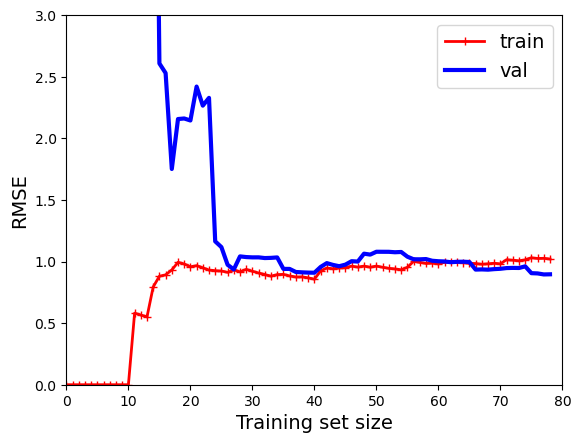


Polynomial Regression of degree 10
Scores: [0.7562807  1.61040951 0.81462508 1.00611379 1.04450266 1.08207683
 0.99147351 1.01542774 1.0279553  1.3447138 ]
Mean: 1.0693578938654702
Standard deviation: 0.2338657420091336


In [140]:
##################################################    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Train a Polynomial Regression model of degree 10
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

# Plot its learning curves
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown in the book
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# display Cross-validation Scores
poly_scores = cross_val_score(polynomial_regression, X, y, scoring="neg_mean_squared_error", cv=10)
poly_rmse_scores = np.sqrt(-poly_scores)
print("\nPolynomial Regression of degree 10")
display_scores(poly_rmse_scores)



### Perform cross-validation for the linear regression model, use the display scores function to print the scores, mean and the standard deviation.


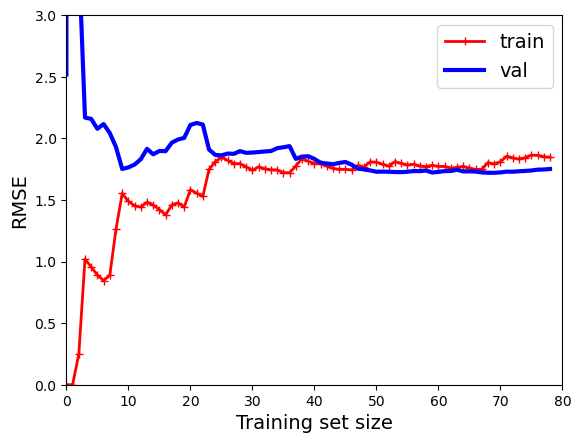


 Linear Regression
Scores: [1.87697133 1.42476405 2.0288836  1.87092824 1.76222959 1.71559427
 1.59204656 2.13357062 2.25096481 1.90083731]
Mean: 1.8556790373737027
Standard deviation: 0.23446661132304825


In [141]:
# Train a Linear Regression model
lin_reg = LinearRegression()

# Plot its learning curves
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
#save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown
    
# display Cross-validation Scores
lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("\n Linear Regression")
display_scores(lin_rmse_scores)

### Perform cross-validation for the ridge regression model, use the display scores function to print the scores, mean and the standard deviation.


Ridge:closed-form prediction [[4.93514556]]


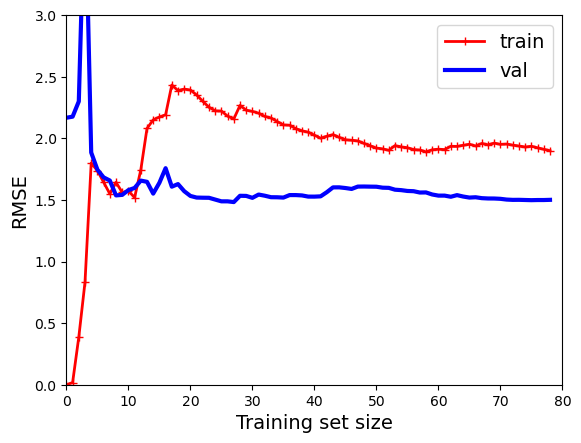

Ridge Closed Form Solution
Scores: [1.87827922 1.42532103 2.03047998 1.8736621  1.75846858 1.71249796
 1.59079183 2.1304599  2.2537061  1.90245516]
Mean: 1.8556121868853697
Standard deviation: 0.23512369057193405


Ridge:stochastic prediction [4.9179542]


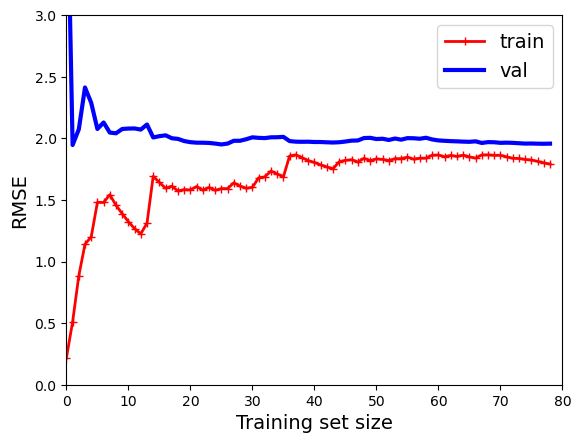

Ridge Stochastic Gradient Descent
Scores: [1.88015097 1.42932499 2.0270095  1.86821179 1.75958125 1.71529128
 1.57255301 2.10898007 2.27046012 1.89562297]
Mean: 1.8527185967723923
Standard deviation: 0.23636927275424416


In [142]:
# Ridge Regression, using a closed-form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
pred=ridge_reg.predict([[1.5]])
print("Ridge:closed-form prediction", pred)

# Plot its learning curves
plot_learning_curves(ridge_reg, X, y)
plt.axis([0, 80, 0, 3])           # not shown in the book
#save_fig("learning_curves_plot")  # not shown
plt.show()  

# display Cross-validation Scores
RCFS_scores = cross_val_score(ridge_reg, X, y, scoring="neg_mean_squared_error", cv=10)
RCFS_rmse_scores = np.sqrt(-RCFS_scores)
print("Ridge Closed Form Solution")
display_scores(RCFS_rmse_scores)


############################

# Ridge, using a Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
pred=sgd_reg.predict([[1.5]])
print("\n\nRidge:stochastic prediction", pred)

# Plot its learning curves
plot_learning_curves(sgd_reg, X, y.ravel())
plt.axis([0, 80, 0, 3])           # not shown in the book
#save_fig("learning_curves_plot")  # not shown
plt.show()  

# display Cross-validation Scores
RSGD_scores = cross_val_score(sgd_reg, X, y.ravel(), scoring="neg_mean_squared_error", cv=10)
RSGD_rmse_scores = np.sqrt(-RSGD_scores)
print("Ridge Stochastic Gradient Descent")
display_scores(RSGD_rmse_scores)

### Perform cross-validation for the lasso regression model, use the display scores function to print the scores, mean and the standard deviation.


Lasso regression prediction [4.88461033]


/usr/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


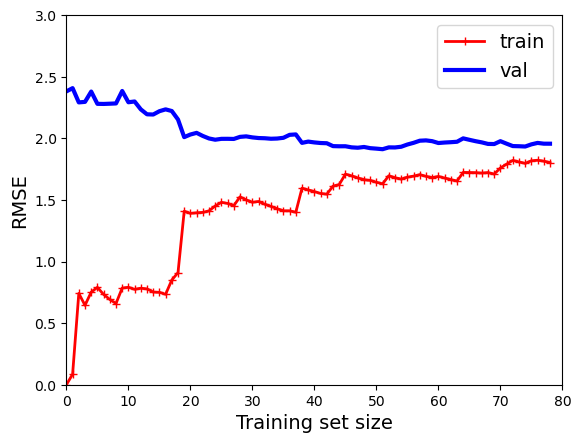

Lasso Regression
Scores: [1.89078312 1.43172441 2.0449935  1.89835207 1.72969025 1.68874347
 1.58095855 2.10664879 2.2789512  1.91719931]
Mean: 1.8568044655671916
Standard deviation: 0.24161125793245986


In [143]:
# Lasso Regression (L1)
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
pred = lasso_reg.predict([[1.5]])
print("Lasso regression prediction", pred)

# Plot its learning curves
plot_learning_curves(lasso_reg, X, y)
plt.axis([0, 80, 0, 3])           # not shown in the book
#save_fig("learning_curves_plot")  # not shown
plt.show()  


# display Cross-validation Scores
lg_scores = cross_val_score(lasso_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lg_rmse_scores = np.sqrt(-lg_scores)
print("Lasso Regression")
display_scores(lg_rmse_scores)

### Create a polynomial regression model of degree 2 From X and y. Perform cross-validation for it, use the display scores function to print the scores, mean and the standard deviation.


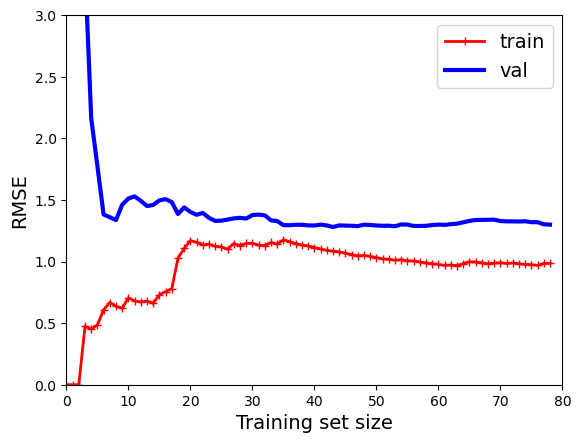


Polynomial Regression of degree 2
Scores: [0.80608427 1.43218776 0.96016107 1.02727691 1.05858778 1.20676424
 0.88119654 1.12599909 1.045346   1.07263953]
Mean: 1.0616243181170988
Standard deviation: 0.16500059077811244


In [144]:
# Train a Polynomial Regression model of degree 10
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

# Plot its learning curves
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown in the book
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# display Cross-validation Scores
poly_scores = cross_val_score(polynomial_regression, X, y, scoring="neg_mean_squared_error", cv=10)
poly_rmse_scores = np.sqrt(-poly_scores)
print("\nPolynomial Regression of degree 2")
display_scores(poly_rmse_scores)

### Lasso Regression with Polynomial Features

/usr/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


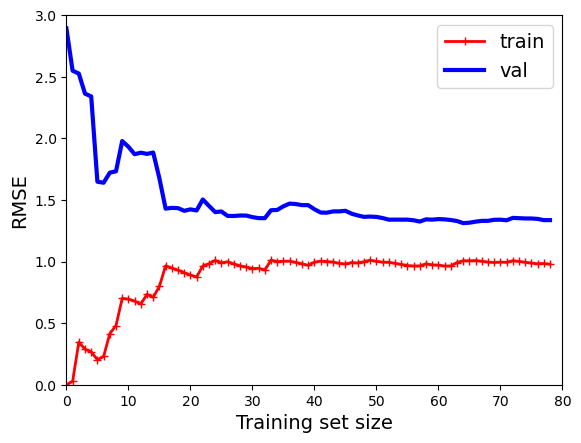


Lasso Polynomial Regression of degree 2 and alpha: 0.1
Scores: [0.81379197 1.36634992 0.97144229 1.068425   1.05483197 1.20152993
 0.88731046 1.1322753  1.08717258 1.07336071]
Mean: 1.0656490110715382
Standard deviation: 0.1476762307510778


In [145]:
# Train a Polynomial Regression model of degree 10
alpha = 0.1
L1polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("L1poly_reg", Lasso(alpha=alpha)),
    ])

# Plot its learning curves
plot_learning_curves(L1polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown in the book
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# display Cross-validation Scores
L1poly_scores = cross_val_score(L1polynomial_regression, X, y, scoring="neg_mean_squared_error", cv=10)
L1poly_rmse_scores = np.sqrt(-L1poly_scores)
print("\nLasso Polynomial Regression of degree 2 and alpha: "+ str(alpha) )
display_scores(L1poly_rmse_scores)

### Ridge Regression with Polynomial Features

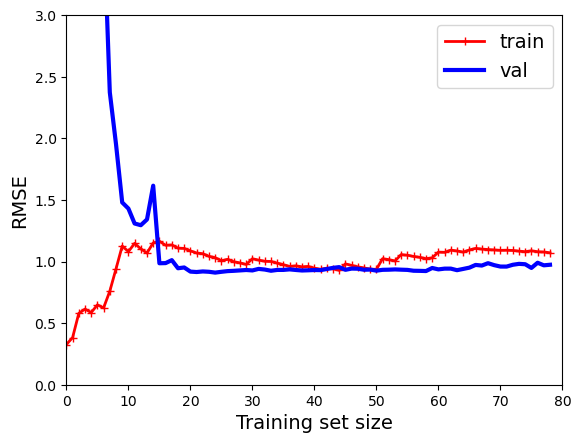


Ridge RegressionPolynomial Regression of degree 2 and alpha: 0.1
Scores: [0.86415751 1.46363978 0.94300852 1.01111568 1.06103502 1.23821035
 0.91773532 1.08948584 1.05654977 1.07932449]
Mean: 1.0724262279744314
Standard deviation: 0.1640322894935683


In [146]:
sgd_reg = SGDRegressor(penalty="l2")

# Train a Ridge Polynomial Regression model of degree 2
SGDpolynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("SGDpoly_reg", SGDRegressor(penalty="l2")),
    ])

# Plot its learning curves
plot_learning_curves(SGDpolynomial_regression, X, y.ravel())
plt.axis([0, 80, 0, 3])           
#save_fig("learning_curves_plot")  
plt.show()                        

# display Cross-validation Scores
SGDpoly_scores = cross_val_score(SGDpolynomial_regression, X, y.ravel(), scoring="neg_mean_squared_error", cv=10)
SGDpoly_rmse_scores = np.sqrt(-SGDpoly_scores)
print("\nRidge RegressionPolynomial Regression of degree 2 and alpha: "+ str(alpha) )
display_scores(SGDpoly_rmse_scores)

###  Which model would you choose based on those cross-validation scores?


Based on the cross-validation scores, the model to choose is the Polynomial Regression of degree 2.

The goal of cross-validation is to estimate how well a model will perform on unseen data. The lower the mean, the better the model is at fitting the data.

Let's compare the mean scores of the models:

- Polynomial Regression of degree 2: Mean score = 0.958
- Lasso Regression: Mean score = 1.703
- Ridge Stochastic Gradient Descent: Mean score = 1.701
- Ridge Closed Form Solution: Mean score = 1.701
- Linear Regression: Mean score = 1.701
- Polynomial Regression of degree 10: Mean score = 1.047
- Lasso Polynomial Regression of degree 2: Mean score = 1.001
- Ridge Polynomial Regression of degree 2: Mean score = 0.994

The Polynomial Regression of degree 2 has the lowest mean score, indicating that it has the best performance among the models tested. It strikes a good balance between model complexity and performance, likely capturing the underlying patterns in the data without overfitting or underfitting.

The other models, including the higher-degree Polynomial Regression, exhibit higher mean scores, which suggest worse performance or potential overfitting. Models like Lasso Regression and Ridge Regression (both Stochastic Gradient Descent and Closed Form Solution) seem to have similar mean scores as Linear Regression, indicating that they might not provide significant improvements in this particular case.

## 3. The file bloodpressure.csv contains blood data set. Build ridge regression models of multiple linear regression to predict systolic pressure using the other features. You can use different $\alpha$ values (e.g. from 0 to 4 at 0.1 interval) to build the models. Use cross-validation to select the best $\alpha$ value. 
(Hint: The data has categorical features, so these need to be converted into dummy features before you can use them for regression, using function `pandas.get_dummies()`. You also need to drop column 0 (ID) and column 7 (systolic) when fitting the model, and use column 7 (systolic) as the labels.)

In [167]:
df = pd.read_csv("bloodpressure.csv")
# view the data
df.head()

ID-NUMBER  AGE  ED-LEVEL  SMOKING STATUS  EXERCISE  WEIGHT  SERUM-CHOL  \
0          1   27         2               1         1     120         193   
1          2   18         1               0         1     145         210   
2          3   32         2               0         0     118         196   
3          4   24         2               0         1     162         208   
4          5   19         1               2         0     106         188   

   SYSTOLIC   IQ  SODIUM GENDER MARITAL-STATUS  
0       126  118     136      F              M  
1       120  105     137      M              S  
2       128  115     135      F              M  
3       129  108     142      M              M  
4       119  106     133      F              S

In [177]:
# Extract the Features 
X = df.drop(columns = ["ID-NUMBER","SYSTOLIC"])

# Convert categorical values to numeric and drop columns that are irrelevant due to 1:1 relationships
X = pd.get_dummies(X, drop_first=True)

print(X.head())

   AGE  ED-LEVEL  SMOKING STATUS  EXERCISE  WEIGHT  SERUM-CHOL   IQ  SODIUM  \
0   27         2               1         1     120         193  118     136   
1   18         1               0         1     145         210  105     137   
2   32         2               0         0     118         196  115     135   
3   24         2               0         1     162         208  108     142   
4   19         1               2         0     106         188  106     133   

   GENDER_M  MARITAL-STATUS_M  MARITAL-STATUS_S  MARITAL-STATUS_W  
0         0                 1                 0                 0  
1         1                 0                 1                 0  
2         0                 1                 0                 0  
3         1                 1                 0                 0  
4         0                 0                 1                 0  


In [175]:
# Extract the Labels
y = df["SYSTOLIC"] 
print(y.head())

0    126
1    120
2    128
3    129
4    119
Name: SYSTOLIC, dtype: int64


In [176]:
# Ridge Regression of Multiple Linear Regression
Alpha = np.arange(0,4.1,0.1)

alpha_scores = []
for i in Alpha:
    ridge_reg = Ridge(alpha=i, solver="cholesky")
    ridge_reg.fit(X, y)
    
    # pred=ridge_reg.predict([[1.5]])
    # print("Ridge:closed-form prediction", pred)
    
    # Plot its learning curves
    # plot_learning_curves(ridge_reg, X, y)
    # plt.axis([0, 80, 0, 10])           # not shown in the book
    # #save_fig("learning_curves_plot")  # not shown
    # plt.show()  

    # display Cross-validation Scores
    RCFS_scores = cross_val_score(ridge_reg, X, y, scoring="neg_mean_squared_error", cv=10)
    RCFS_rmse_scores = np.sqrt(-RCFS_scores)
    # print("Ridge Closed Form Solution with alpha: " + str(i))
    # display_scores(RCFS_rmse_scores)
    alpha_scores.append(RCFS_rmse_scores.mean())
    # print("\n\n")

best_alpha_index = np.argmin(alpha_scores)
best_alpha = Alpha[best_alpha_index]
best_rmse = alpha_scores[best_alpha_index]

print("Best alpha:", best_alpha)
print("Best RMSE:", best_rmse)



Best alpha: 1.3
Best RMSE: 7.521382803417437
